# Généralisation d'un modèle de Machine Learning
Un des concepts important lors de l'entraînement d'un modèle est
sa capacité à généraliser.

Nous allons ici voir quels sont les enjeux dont on parle lorsque
l'on parle de généralisation, et comment l'évaluer.

## Le besoin de généraliser
Dans le schéma classique d'un apprentissage supervisé, vous voudrez un modèle capable
de prédire une certaine valeur `y` à partir d'un ensemble de valeurs `X`.

Pour qu'un tel modèle soit utile, il faut qu'il soit capable de donner une bonne solution (approximative)
pour des données jamais observées. En effet, à quoi bon utiliser un modèle sur des données où l'on a déjà
collecté et mesuré la valeur de `y` !

Pendant l'entraînement d'un modèle, on mesure souvent sa performance sur le jeu de données utilisé pendant l'entraînement.
Cela revient à demander à un étudiant s'il est bien capable de refaire de tête des exercices où on lui a donné
la correction auparavant.
Comment faire pour s'assurer qu'il est capable de réussir la plupart des exercices ?

*On s'entends bien ici que l'on veut que l'étudiant réussisse des exercices qui sont bien du même cours que ceux
sur lesquels il s'entraîne. Pour que l'analogie avec un modèle de ML fonctionne, il faudrait donc le soumettre à
de nouvelles données qui sont issues de la même distribution.*

## Définitions
### Overfitting
L'overfitting, ou sur-apprentissage en français, est le résultat d'un modèle qui a "trop appris". Il est parfaitement
capable de prédire la bonne solution pour un exemple utilisé pour l'entraîné, mais il devient tout d'un coup très mauvais
lorsqu'on l'évalue sur une toute nouvelle donnée.

Dans le cas de notre étudiant, à force d'entraînement sur les quelques exercices fournis, il aura fini par remarquer
certaines astuces qui permettent de court-circuiter des questions afin d'être plus performant. Mais ces astuces
peuvent se révéler n'être que des coïncidences qui fonctionnent bien sur les quelques exercices mais qui sont en fait fausses.
L'utilisation de ces fausses corrélations s'avère alors dévastateur lors de l'évaluation sur de nouveaux exercices !

On parle alors de sur-entraînement. La machine a détecté des corrélations qui semblent utiles sur le jeu d'entraînement,
mais elles sont en fait de fausses corrélations qui n'expliquent en rien la relation entre `X` et `y`.
Cela arrive très souvent, et c'est la hantise de toute personne travaillant dans le ML.

### Underfitting
Le sous-apprentissage est ce qui arrive lorsqu'un modèle est en sous-régime.
D'une façon ou d'une autre, le modèle pourrait faire mieux, de manière générale.

Cela revient à un étudiant qui n'a pas réussi à apprendre sur les exercices d'entraînement.
Il n'a peut-être pas assez travaillé (entraînement trop court),
les exercices n'étaient pas assez complets (dataset trop petit),
ou les exercices étaient simplement trop difficiles pour lui (modèle de ML inadapté).

### Généralisation d'un modèle
Un modèle généralise bien lorsqu'il performe bien sur des données provenant de
la même distribution que celle utilisée pour l'entraînement.
Cela signifie que sur un exemple jamais rencontré pendant l'entraînement,
le modèle effectue de bonnes prédictions.

Si un modèle généralise bien, c'est qu'**il a appris des corrélations qui
sont utiles**.

Si notre étudiant généralise, c'est que l'entraînement a porté ses fruits
sans avoir sur-appris pour autant.

## Exemples
Exemple simple : générer des données y = x^2.

### Overfitting
Regression polynomiale avec un degré supérieur à 2.

### Underfitting
Regression linaire.

### Généralisation
Regression polynomiale de degré 2.

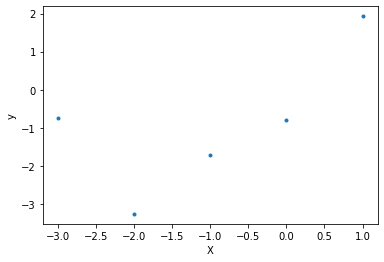

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

n_points = 5
X = np.arange(-n_points // 2, n_points // 2)
y = X ** 2 + 3 * X - 1 + rng.normal(scale=2, size=n_points)

plt.plot(X, y, '.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Underfitting
Un exemple d'underfitting sur de telles données serait de
réaliser une simple régression linéaire.

Le modèle est trop simple, la relation entre X et y est mal
capturée par ce dernier.

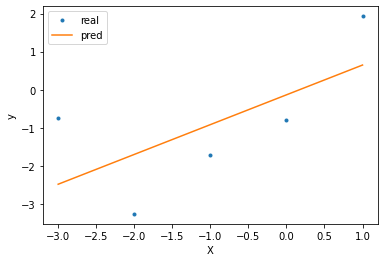

R² score: 0.42870723713067405


In [2]:
from sklearn.linear_model import LinearRegression

X_train = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y)

y_pred = model.predict(X_train)

plt.plot(X, y, '.', label='real')
plt.plot(X, y_pred, label='pred')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

r_squared = model.score(X_train, y)
print('R² score:', r_squared)

### Overfitting
Un moyen d'améliorer le modèle assez facilement est de générer les relations
non-linéaires en amont avant d'entraîner le modèle linéaire.

On peut ainsi générer de nouvelles features, à partir d'intéractions polynomiales.
On choisit le degré du polynôme en tant qu'hyperparamètre.
Cependant, il faut être précautionneux dans le choix de cet hyperparamètre.
Il peut facilement mener à un régime d'overfitting. En effet,
il est facile d'interpôler un polynôme sur un certain nombre de point,
Mais le comportement du polynôme en dehors de ces points est ensuite très arbitraire.

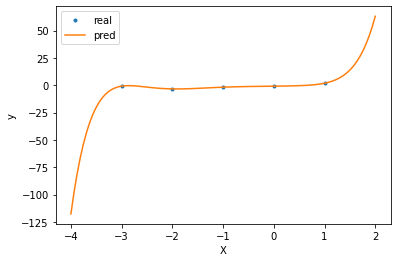

R² score: 1.0


In [3]:
degre_polynome = 7

X_train = np.array([
    X ** d
    for d in range(1, degre_polynome + 1)
]).swapaxes(1, 0)

model = LinearRegression()
model.fit(X_train, y)

X_range = np.linspace(-n_points // 2 - 1, n_points // 2, num=100)
X_eval = np.array([
    X_range ** d
    for d in range(1, degre_polynome + 1)
]).swapaxes(1, 0)
y_pred = model.predict(X_eval)

plt.plot(X, y, '.', label='real')
plt.plot(X_range, y_pred, label='pred')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

r_squared = model.score(X_train, y)
print('R² score:', r_squared)

On peut voir que ce modèle, bien qu'il ait des performances parfaites (R² = 1)
a un mauvais comportement en dehors des points d'entraînement.
Dès qu'on lui demande les valeurs de y pour des X qu'il n'a jamais vu lors
de l'entraînement, la réponse est au mieux approximative, et au pire complètement fausse !

### Généralisation

Un meilleur modèle que le précédent est un modèle dont on a bridé
un peu les performances, en lui permettant de n'avoir
accès qu'à des features d'un degré moins élevé.

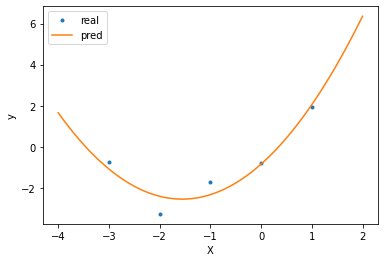

Score R² sur entraînement: 0.9137936586866177


In [4]:
degre_polynome = 2

X_train = np.array([
    X ** d
    for d in range(1, degre_polynome + 1)
]).swapaxes(1, 0)

model = LinearRegression()
model.fit(X_train, y)

X_range = np.linspace(-n_points // 2 - 1, n_points // 2, num=100)
X_eval = np.array([
    X_range ** d
    for d in range(1, degre_polynome + 1)
]).swapaxes(1, 0)
y_pred = model.predict(X_eval)

plt.plot(X, y, '.', label='real')
plt.plot(X_range, y_pred, label='pred')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

r_squared = model.score(X_train, y)
print('Score R² sur entraînement:', r_squared)

Ici, ce modèle a un comportement qui correspond bien plus au comportement voulu.
Bien qu'il ait un R² plus faible que le précédent sur le jeu d'entraînement,
Il n'a pas sur-appris et effectue des prédictions bien plus justes en dehors des points d'entraînement.

Le meilleur modèle ici est un modèle avec un degré 2, car c'est ainsi qu'ont été générées les données.
Cependant, un tel modèle n'aura jamais un R² à 1, car il y a un bruit intrinsèque dans la génération des données. Ce genre de bruit peut amener
un modèle de ML à faire des corrélations qui sont en fait que des coïncidences.
Réduire la capacité d'un modèle permet d'éviter d'apprendre sur ce bruit et de
ce concentrer sur l'essentiel.

Dans le monde réel, le bruit est partout dans nos données et on ne peut
s'en séparer lors de l'entraînement d'un modèle. Il faut faire avec !
Le bruit peut provenir d'une imprécision dans les mesures ou d'un comportement
aléatoire intrinsèque de ce qui est mesuré.

## Évaluer la généralisation d'un modèle
On a donc besoin d'évaluer le pouvoir de généralisation de nos modèles.
En fait on peut voir sur les exemples précédents que le meilleur moyen de détecter un mauvais comportement du modèle est de le
tester sur des données qu'il n'a jamais vues auparavant. Le plus simple est donc de diviser les données en deux groupes :

* **Données d'entraînement**
* **Données de test**

Le premier jeu de données est utilisé pour entraîner le modèle, le second pour évaluer la capacité du modèle à généraliser à de nouveaux exemples.

### Train/Test
Il est donc tout le temps obligatoire de diviser les données en ces deux catégories. En anglais, on parle de **training dataset** et **testing dataset**.
Le jeu de test doit être représentatif de la distribution des données réelle. En général, on mélange toutes nos données et on en tire au hasard 20%
qui constitueront notre jeu de test.

C'est sur le jeu de test que les performances finales du modèle peuvent être déduites. On n'utilises jamais les métriques sur le jeu d'entraînement
comme métriques finales d'un modèle.

## La recherche d'hyperparamètres

*Présentation des hyperparamètres ?*

Vous venez d'entraîner un modèle, vous l'évaluer alors sur le jeu de test et vous observez des performances décevantes. Vous pensez pouvoir
l'améliorer en modifiant quelques hyperparamètres. Ainsi, vous vous mettez à faire plusieurs aller-retours entre l'évaluation du modèle sur le jeu de test
et l'entraînement jusqu'à atteindre ce que vous pensez être les meilleures performances atteignables par le modèle.

Oui mais voilà, à force de régler vos hyperparamètres grâce au jeu de test, vous êtes en train indirectement d'optimiser le modèle sur les données de test.
Cela revient à un étudiant de remarquer petit à petit que certaines techniques fonctionnent particulièrement bien sur le jeu de test. En fait, il est
en train d'overfit sur le jeu de test.

De manière générale, **il faut éviter au maximum de faire fuiter les informations contenues par le jeu de test dans l'entraînement de nos modèles.**
Il faut le garder uniquement pour l'évaluation finale de notre modèle, une fois que l'on a fixé nos hyperparamètres.

### Train/Val/Test
Alors comment sélectionner nos hyperparamètres ? On utilise un troisième de jeu de données : le **jeu de données de validation**.
C'est avec ce **validation dataset** que vous allez régler (*fine-tune*) les hyperparamètres de votre modèle.
Ce jeu de données est tiré au hasard parmi vos données de la même façon que vous avez créer votre jeu de test.

En général, voici comment je m'occupe de mes données pour créer les datasets :

* **Données initiales** (*100%*):

    * Données de test (*20%*)
    * Données restantes (*80%*):

        * Données de validation (*20%*)
        * Données d'entraînement (*80%*)

*Diagramme avec des patates est probablement mieux*

## Retour sur l'exemple : une bonne façon de faire
On peut revenir sur l'exemple précédent avec nos polynômes en appliquant ce que nous venons de voir pour entraîner un modèle de la bonne façon.

Nous générons 100 points, et nous divisons ces 100 points en les trois groupes d'entraînement, de validation et de test.

Nous évaluons sur le jeu de validation ensuite plusieurs modèles entraînés sur le dataset d'entraînement. Finalement on choisit le meilleur modèle selon
le jeu de validation et on mesure les performances finales sur le jeu de test.

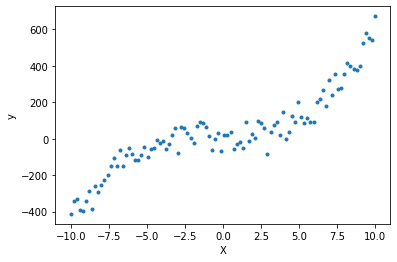

In [5]:
n_points = 100
X = np.linspace(-10, 10, num=n_points)
y = 0.5 * X**3 + X ** 2 + 3 * X - 1 + rng.normal(scale=50, size=n_points)

plt.plot(X, y, '.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Score du modèle pour le degré 1
Entraînement : 0.830
Validation : 0.658

Score du modèle pour le degré 3
Entraînement : 0.960
Validation : 0.885

Score du modèle pour le degré 5
Entraînement : 0.964
Validation : 0.871

Score du modèle pour le degré 10
Entraînement : 0.966
Validation : 0.875

Score du modèle pour le degré 25
Entraînement : 0.944
Validation : 0.856

Score du modèle pour le degré 50
Entraînement : 0.777
Validation : -2.964

Meilleur modèle pour le degré 3
Score final sur le jeu de test : 0.948


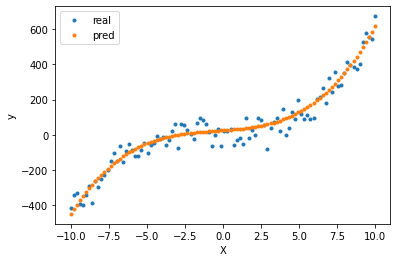

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

def polynome_features(X: np.ndarray, degres: int) -> np.ndarray:
    return np.array([
        X ** d
        for d in range(1, degres + 1)
    ]).swapaxes(1, 0)


def train_model(X: np.ndarray, y: np.ndarray, degres: int) -> LinearRegression:
    X = polynome_features(X, degres)

    model = LinearRegression()
    model.fit(X, y)
    return model

def eval_model(
        model: LinearRegression,
        X: np.ndarray,
        y: np.ndarray,
        degres: int
    ) -> float:
    X = polynome_features(X, degres)
    return model.score(X, y)


degres = [1, 3, 5, 10, 25, 50]
best_degre, best_r_squared = 1, 0
for degre_polynome in degres:
    model = train_model(X_train, y_train, degre_polynome)
    r_squared_train = eval_model(model, X_train, y_train, degre_polynome)
    r_squared_val = eval_model(model, X_val, y_val, degre_polynome)
    print(f'Score du modèle pour le degré {degre_polynome}')
    print(f'Entraînement : {r_squared_train:.3f}')
    print(f'Validation : {r_squared_val:.3f}\n')

    if best_r_squared < r_squared_val:
        best_r_squared = r_squared_val
        best_degre = degre_polynome


print(f'Meilleur modèle pour le degré {best_degre}')
model = train_model(X_train, y_train, best_degre)
r_squared_test = eval_model(model, X_test, y_test, best_degre)
print(f'Score final sur le jeu de test : {r_squared_test:.3f}')

y_pred = model.predict(polynome_features(X, best_degre))
plt.plot(X, y, '.', label='real')
plt.plot(X, y_pred, '.', label='pred')

plt.xlabel('X')
plt.ylabel('y')

plt.legend()
plt.show()

On remarque que le degré final est celui théoriquement attendu.
Notre modèle généralise bien.
Il est possible d'aller plus loin en réduisant expressement l'overfitting dans la fonction de loss, cela sera abordé au prochain chapitre !

## Détails supplémentaires
Chaque paramètre doit être entraîné uniquement à l'aide du jeu d'entraînement. Ainsi, même lors du preprocessing de vos données,
vous devez faire en sorte que tout information utilisée doit provenir du jeu d'entraînement uniquement. Par exemple, si vous
décidez de normaliser vos données selon une loi normale, vous devez utiliser la moyenne et l'écart-type du jeu d'entraînement
pour normaliser toutes vos données. Une erreur classique serait d'utiliser la moyenne et l'écart-type de chaque jeu de données pour la normalisation.

## Conclusion
Nous avons besoin de s'assurer qu'un modèle généralise bien. Il est toujours possible de trouver des corrélations statistiques
(voir `Spurious Correlations`) dans les données d'entraînement qui semblent expliquer les quelques détails qui améliorent les performances des prédictions.
Or ces petites coïcidences ne permettent pas d'expliquer la relation entre `X` et `y`.

Dans le meilleur des mondes, nous n'aurions pas besoin d'évaluer la généralisation d'un modèle si nous possédions toutes les données possibles et imaginables pour
la tâche considérée. Mais c'est malheureusement impossible (*et cela rendrait d'ailleurs le ML beaucoup moins utile*), il faut donc s'assurer l'utilité du modèle
une fois hors de l'entraînement.

Enfin, il est intéressant que nous évaluons ici la généralisation d'un modèle sur son domaine de distribution. Sachez qu'il existe
toute une branche de l'IA qui se concentre sur la capacité des modèles à généraliser sur d'autres domaines que celui utilisé pour l'entraînement.
On parle alors de *généralisation Out-of-Distribution*.

## Sources
https://tylervigen.com/spurious-correlations

https://out-of-distribution-generalization.com/